<a href="https://colab.research.google.com/github/etmaca5/Biology/blob/main/Casanova_Etienne_hw4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Homework 4: Population Genetics

#### **Please read the following instructions carefully before you continue.**

This template notebook is for Homework 4, due Thursday, May 4th, 2023.

To use this template, click `File` > `Save a copy in Drive`. You now have your own editable copy to which you can add your code. However, before you make changes, note that we've scaffolded this notebook to help get you started:

- We've already written `import` statements for all the modules you should need. This week, you could feasibly do everything without importing any external modules; do whatever is most helpful for you.
- We provide an introduction that lays out one potential approach for solving the problem, explaining what each logical "chunk" of your code ought to accomplish. You can use this as a starting point for writing your own code.  

Of course, if you'd rather do your own thing, you are not required to follow the path we've laid out, or use the modules we've recommended. However, a few things _are_ required (refer to the [Intro to Colab](https://colab.research.google.com/drive/1fq_HaiuYb1L18uGcoA3eGs6taiUafR-6?usp=sharing) notebook):

- _Literate style._ Dumping everything into a single, monstrous code cell is illegible and unacceptable. Remember to divide your code into reasonable, logical chunks, and to follow up each code cell with a text cell that explains and interprets the results.
- _Comments._ That said, writing "literate" code is not an excuse to avoid writing comments :)
- _Problem labels/numbers._ Please use text cells to clearly label where your solution to one problem ends, and the next begins.

Remember that a human is going to read and grade your notebook, so it is in your best interest to help them understand your work clearly. Your finished solution to a given problem should flow coherently from one code cell to the next. (Our "scaffold" helps you do this!)

If you get stuck, remember that [tutorials](https://bi1.caltech.edu/2023/tutorials) are held in-person each week.

---

---

## Introduction

This week's set is one of the most computationally intensive that we'll face, but fear not! For help with plotting, see last week's tutorial recording and notebook.

As always, we will take you to the finish line in this week's tutorial. Recitations and office hours are also available to guide you. Reach out to your TAs for help -- it's what we're here for.

## Question 1c

In [ ]:
## import
import numpy as np
#plots,
import matplotlib.pyplot as plt
#pretty plots!
import seaborn as sns
sns.set_context("poster") #optional
sns.set_style("ticks") #make default plots white and nice

In [ ]:
num_pops = 107
num_gens = 20 #this is in order to obtain the 19th generation
num_flies = 16
num_alls = num_flies * 2
default_start_freq = 0.5
#The frequency that is stored will always be the freq of white alleles


#function creates a coin flip which we will use to randomly select a color
def sim_rand_color(p):
  flip=np.random.rand()
  if flip < p:
    return 1
  else:
    return 0



def run_alleles_simulation(num_generations, num_populations, start_freq, num_alleles):
  freq = np.zeros((num_populations, num_generations)); #this preallocates a frequency array which we will return
  for i in range(0, num_populations): # each population will run
    freq[i, 0] = start_freq;
    new_freq = start_freq;
    for j in range(1, num_generations): # each population of each generation now runs
      flips = np.random.rand(num_alleles); #randomly gets the number of alleles that will flip based on a coin toss
      num_white_alleles = np.sum(flips < freq[i, j-1]) # each new_freq is based on previous generations
      new_freq = num_white_alleles /num_alleles; # changing the frequency for each generation
      freq[i, j] = new_freq;
  return freq;



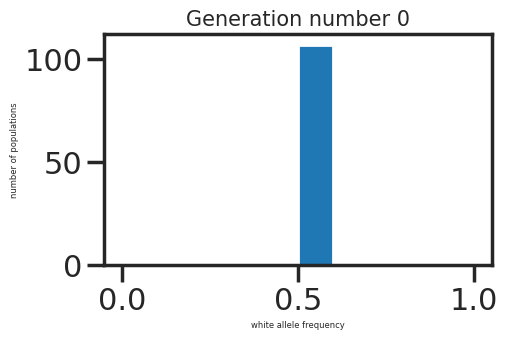

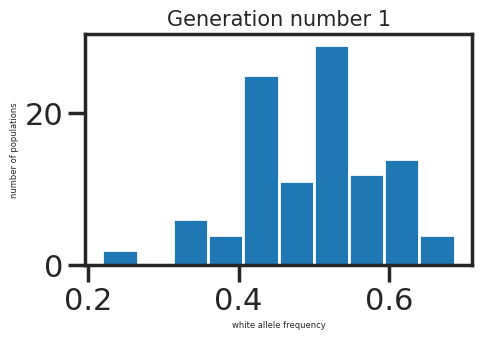

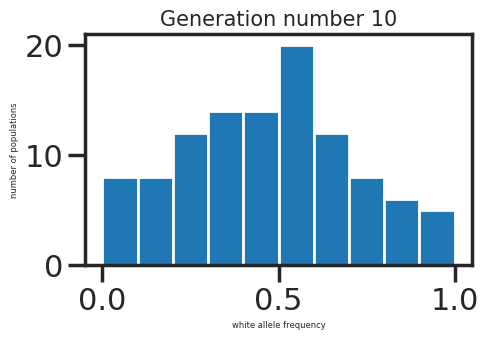

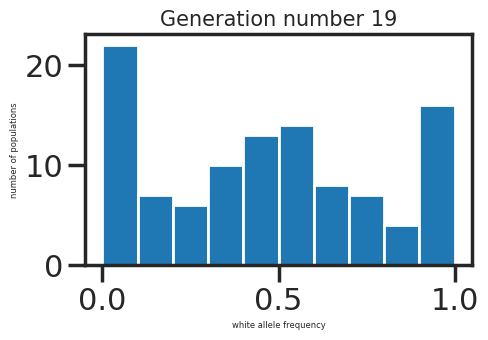

In [ ]:
#Now to show the histograms as described in 1c
frequency = run_alleles_simulation(num_gens, num_pops, default_start_freq, num_alls);


def create_histogram_for_pop(generation_num, frequency_arr):
  fig, ax = plt.subplots(figsize=(5, 3))
  ax.set_title("Generation number " + str(generation_num), size = 15);
  ax.set_xlabel('white allele frequency', size = 6);
  ax.set_ylabel('number of populations', size = 6);
  plt.hist(frequency_arr[:,generation_num]);
  plt.show();



create_histogram_for_pop(0, frequency);
create_histogram_for_pop(1, frequency);
create_histogram_for_pop(10, frequency);
create_histogram_for_pop(19, frequency);

## Question 1d

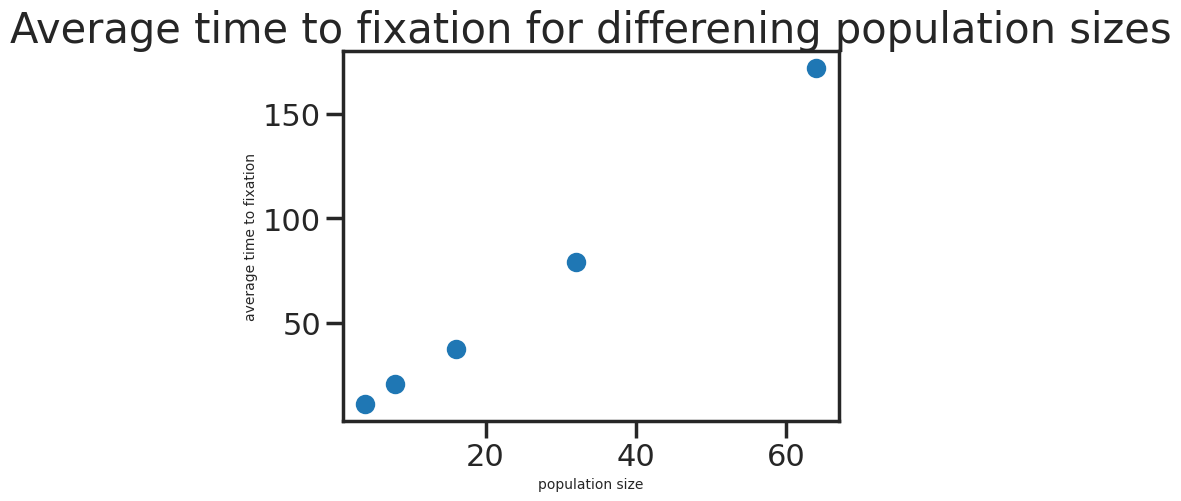

In [ ]:
num_generations = 1001;
populations = [4, 8, 16, 32, 64]
num_populations = 107
start_freq = 0.5
average_time_fixation = np.zeros(len(populations))


def find_average_fixation(num_generations, num_populations, start_freq, pop_size):
  total = 0;
  frequency = run_alleles_simulation(num_generations, num_populations, start_freq, pop_size * 2);
  for i in range(0, num_populations):
    total+= np.min(np.where((frequency[i,:] == 1) | (frequency[i,:] == 0)))
  return float(total) / num_populations;


for i in range(0, len(populations)):
  average_time_fixation[i] = find_average_fixation(num_generations, num_populations, start_freq, populations[i]);


plt.scatter(populations, average_time_fixation);
plt.title("Average time to fixation for differening population sizes", size = 30);
plt.xlabel('population size', size = 10);
plt.ylabel('average time to fixation', size = 10);
plt.show;


## Question 1e

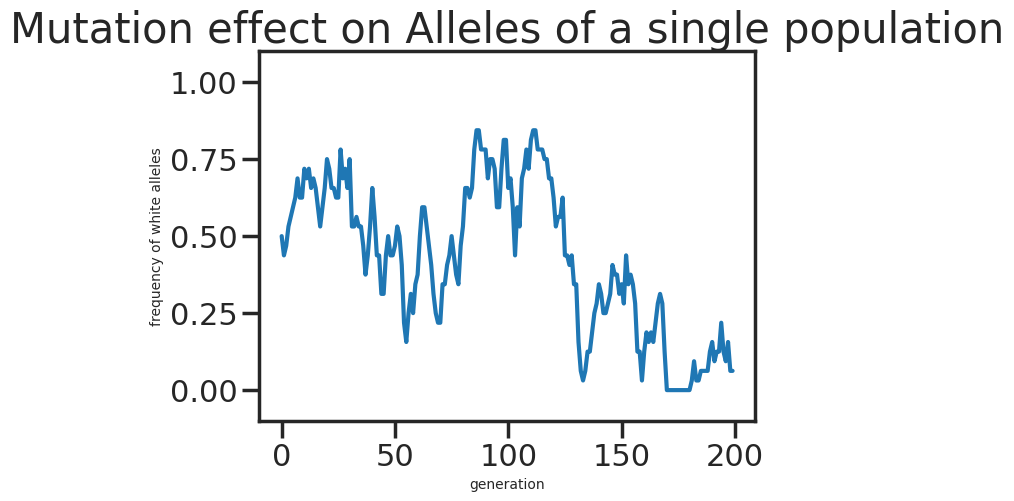

In [ ]:
# now a similar simulation, with differing mutation values
mutation_const = 0.001



#This is for a generalized for multiple populations, to make it easier to use later
#although for question 1e we will only use a single population
def allele_mutation_simulation(num_populations, num_generations, start_freq, num_alleles, mutation_prob):
  freq = np.zeros((num_populations, num_generations));
  for i in range (0, num_populations):
    freq[i,0] = start_freq;
    for j in range (1, num_generations):
      flips = np.random.rand(num_alleles); #very similar code to 1c.
      num_white_alleles = np.sum(flips < freq[i, j-1]); #matching

      white_to_red = np.random.rand(num_white_alleles);
      red_to_white = np.random.rand(num_alleles - num_white_alleles);
      white_to_red_total = np.sum(white_to_red < mutation_prob); #now based on the given probability
      red_to_white_total = np.sum(red_to_white < mutation_prob);
      num_white = num_white_alleles + red_to_white_total - white_to_red_total; # subtracts the number of white transfered to red and adds the number of red to white alleles

      new_freq = num_white /num_alleles;
      freq[i,j] = new_freq;
  return freq;

# now to do it for 1 generations, let's say with 200 generations, 0.5 start frequency, and 32 alleles
generations = 200

frequency_mutation_arr = allele_mutation_simulation(1, generations, 0.5, 32, mutation_const);


plt.plot(frequency_mutation_arr[0,:])
plt.ylim(-0.1, 1.1)
plt.title("Mutation effect on Alleles of a single population", size = 30);
plt.xlabel('generation', size = 10);
plt.ylabel('frequency of white alleles', size = 10);
plt.show;



## Question 1f

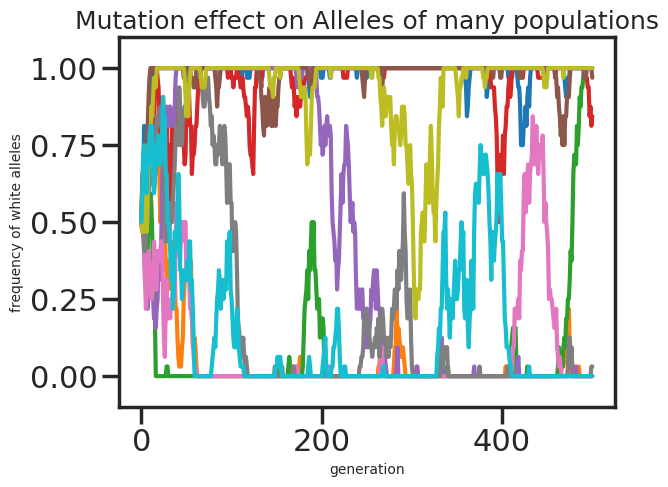

In [ ]:
# now for 100 populations, we can simply use the same function as above
generations = 501
num_populations = 100;


frequency_mutation_two = allele_mutation_simulation(num_populations, generations, 0.5, 32, mutation_const);


#plotting 10 random of these using a for loop
for i in range (1,11):
  population_index = (10 * i) - 1; # just randomly gives us 10 plots to show
  plt.plot(frequency_mutation_two[population_index,:])
plt.title("Mutation effect on Alleles of many populations", size = 18);
plt.xlabel('generation', size = 10);
plt.ylabel('frequency of white alleles', size = 10);
plt.ylim(-0.1, 1.1)
plt.show;



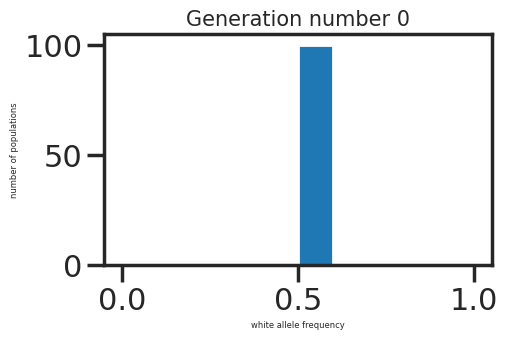

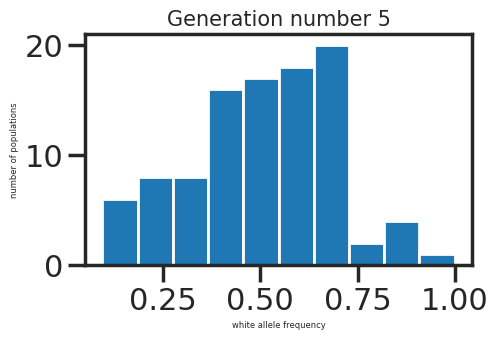

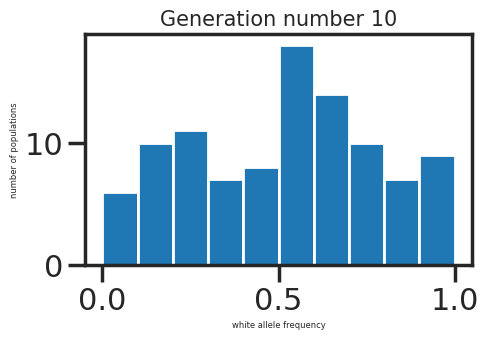

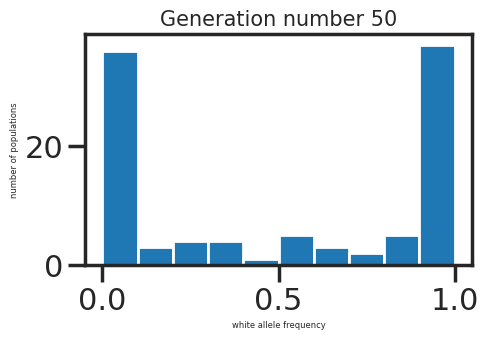

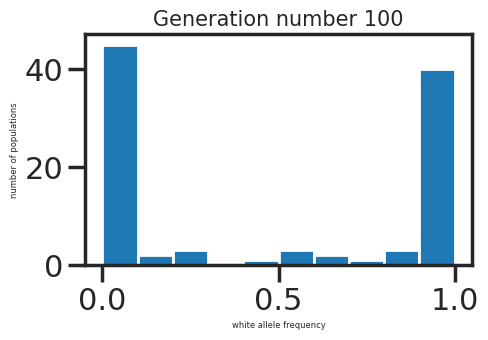

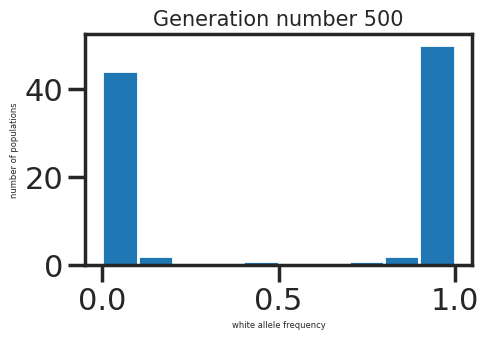

In [ ]:
#now to plot histograms at certain generations, just use the function created earlier
time_points = [0, 5, 10, 50, 100, 500];
for i in range(len(time_points)):
  create_histogram_for_pop(time_points[i], frequency_mutation_two);



Although most of the populations have become completely dominated by 1 allele, when we implement the mutation constant some populations still have a live balance between the two alleles. In the null model, all the populations will have converged, and much much sooner than the mutation simulations will have.

## Question 1g

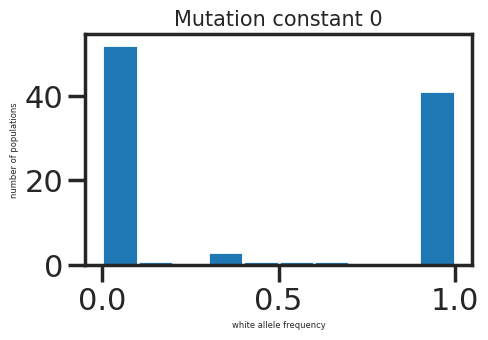

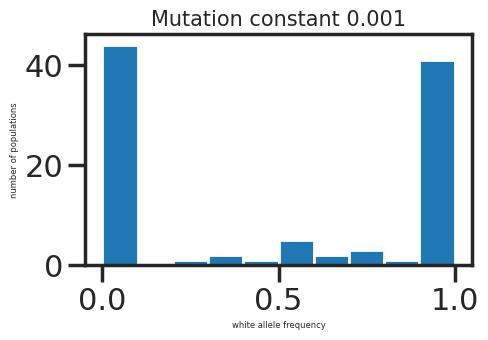

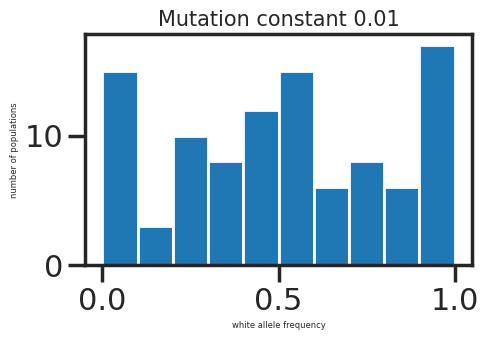

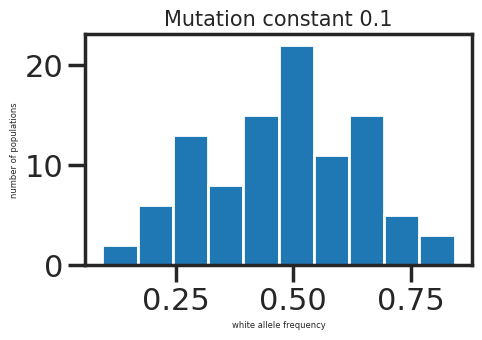

In [ ]:
# now with varying mutation rates


# this function will create the same histogram plots we made early, but now with the mutation const as a parameter
mutation_rates = [0, 0.001, 0.01, 0.1];
def create_histogram_for_mutation_rate(mutation_rate):
  frequency_mutation_final = allele_mutation_simulation(100, 100, 0.5, 32, mutation_rate); # agains choosing 32 alleles
  fig, ax = plt.subplots(figsize=(5, 3))
  ax.set_title("Mutation constant " + str(mutation_rate), size = 15);
  ax.set_xlabel('white allele frequency', size = 6);
  ax.set_ylabel('number of populations', size = 6);
  plt.hist(frequency_mutation_final[:,99]);
  plt.show();

for i in range (len(mutation_rates)):
  create_histogram_for_mutation_rate(mutation_rates[i]);

_add text and code cells here_

## Question 2c

_add text and code cells here_

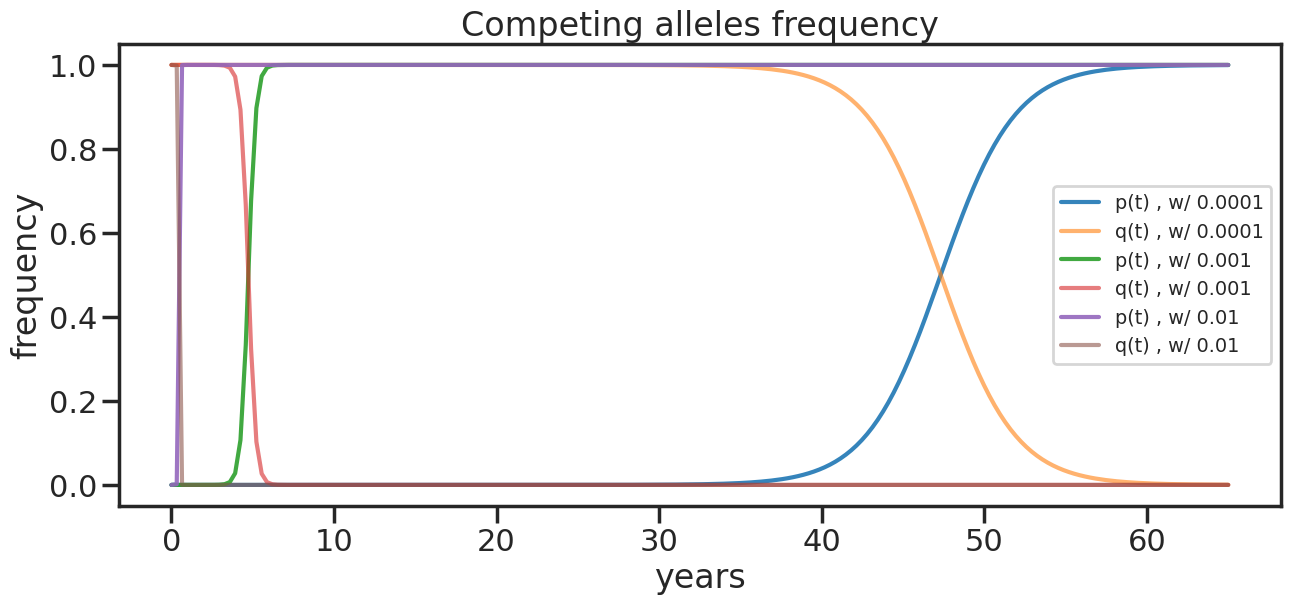

In [ ]:
#plot p(t) and q(t)
import math # in order to use e

s = [10**-4, 10**-3, 10**-2];
hours_per_year = 8760;
fig, ax = plt.subplots(figsize=(15,6))

for i in range (len(s)):
  x = np.linspace(0, 65, num = 200);
  p = 1 / (1 + ((10**9) * (math.e ** (-4380 * x * s[i]))));
  q = 1- p
  ax.plot(x, p, label="p(t) , w/ " + str(s[i]), alpha = 0.9)
  ax.plot(x, q, label="q(t) , w/ " + str(s[i]), alpha = 0.6)


ax.set_title('Competing alleles frequency')
ax.set_xlabel('years')
ax.set_ylabel('frequency')
ax.legend(fontsize = 'xx-small')
plt.show()



---

### Submission instructions

When you're finished, recall the steps for submitting Colab notebooks:

1. Run all the cells from top-to-bottom, in order (`Runtime` > `Run all`).
2. Once the entire notebook has completed running and the output of all cells is visible, save it (`File` > `Save`).
3. Download the notebook in `.ipynb` format (`File` > `Download` > `Download .ipynb`).
4. Rename the file according to the usual convention (`lastname_firstname_hw#.ipynb`), if you haven't already.
5. Upload the file to Canvas.
